# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Описание данных

Данные геологоразведки трёх регионов находятся в файлах:
* /datasets/geo_data_0.csv. Скачать датасет
* /datasets/geo_data_1.csv. Скачать датасет
* /datasets/geo_data_2.csv. Скачать датасет
* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

Подключение библиотек

In [ ]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Загрузка данных каждого региона в отдельные датафреймы.

In [ ]:
def check_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())

функция для проверки значений датафрейма

In [ ]:
check_columns(geo_data_0)

Уникальные значения столбца id
['txEyH' '2acmU' '409Wp' ... '3rnvd' '7kl59' '1CWhH']
Уникальные значения столбца f0
[0.70574498 1.33471129 1.02273226 ... 1.02958465 0.99816289 1.76475393]
Уникальные значения столбца f1
[-0.4978225  -0.34016425  0.15199044 ...  0.01878693 -0.52858167
 -0.26641676]
Уникальные значения столбца f2
[ 1.22116995  4.36508033  1.41992624 ... -1.34830814  1.58386866
  5.72284937]
Уникальные значения столбца product
[105.28006184  73.03775027  85.26564713 ...  64.37544259  74.04076435
 149.63324561]


In [ ]:
check_columns(geo_data_1)

Уникальные значения столбца id
['kBEdx' '62mP7' 'vyE1P' ... '09gWa' 'rqwUm' 'relB0']
Уникальные значения столбца f0
[-15.00134818  14.27208781   6.26318735 ...  -7.37889139   0.66571381
  -3.42613898]
Уникальные значения столбца f1
[-8.27599995 -3.47508322 -5.94838579 ... -3.08410387 -6.15259286
 -7.7942742 ]
Уникальные значения столбца f2
[-5.87601369e-03  9.99182737e-01  5.00116016e+00 ...  4.99865060e+00
  1.00014635e+00 -3.29851829e-03]
Уникальные значения столбца product
[  3.17910258  26.95326103 134.76630516 137.94540774  84.03888568
 110.99214671  53.90652206   0.         107.81304413  57.08562465
  30.13236361  80.85978309]


In [ ]:
check_columns(geo_data_2)

Уникальные значения столбца id
['fwXo0' 'WJtFt' 'ovLUW' ... 'tKPY3' 'nmxp2' 'V9kWn']
Уникальные значения столбца f0
[-1.1469871   0.2627779   0.19458728 ... -1.19993432 -2.41989641
 -2.55142066]
Уникальные значения столбца f1
[ 0.96332792  0.26983896  0.289035   ... -2.95763723  2.41722066
 -2.02562514]
Уникальные значения столбца f2
[-0.82896492 -2.53018652 -5.58643277 ...  5.219411   -5.54844392
  6.09089066]
Уникальные значения столбца product
[ 27.75867323  56.06969663  62.87191005 ... 157.08007975  51.79525299
 102.77576749]


В данных отсутсвуют пропуски.

In [ ]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

Удалили из каждого датафрейма признак id. Он не имеет значимости при обучении модели.

In [ ]:
def check_zeros(df, target_name):
    zeros = df[df[target_name] == 0][target_name].count()
    percent = zeros / df.shape[0]
    print('Количество нулевых значений -', zeros)
    print('Процент нулевых значений -', percent)

Функция для проверки значений датафрейма

In [ ]:
check_zeros(geo_data_0, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 1e-05


In [ ]:
check_zeros(geo_data_1, 'product')

Количество нулевых значений - 8235
Процент нулевых значений - 0.08235


In [ ]:
check_zeros(geo_data_2, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 1e-05


In [ ]:
geo_data_0[geo_data_0['product'] == 0]

,f0,f1,f2,product
57263,-0.702064,0.375992,0.236572,0.0


In [ ]:
geo_data_1[geo_data_1['product'] == 0]

,f0,f1,f2,product
11,16.320755,-0.562946,-0.001783,0.0
13,6.695604,-0.749449,-0.007630,0.0
62,21.418478,-5.134490,-0.002836,0.0
63,6.822701,3.104979,-0.000723,0.0
77,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...
99936,5.085749,-3.980305,0.005063,0.0
99948,8.277805,-9.178818,0.003275,0.0
99956,13.343983,-1.290200,0.005980,0.0
99961,13.854163,-11.528089,-0.005556,0.0


In [ ]:
geo_data_2[geo_data_2['product'] == 0]

,f0,f1,f2,product
68149,-0.865596,-1.615247,-4.126441,0.0


Отображение нулевых значений целевого признака product

In [ ]:
def oil_hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[15,10])

    plt.hist(seria, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

Функция для построения гистограммы

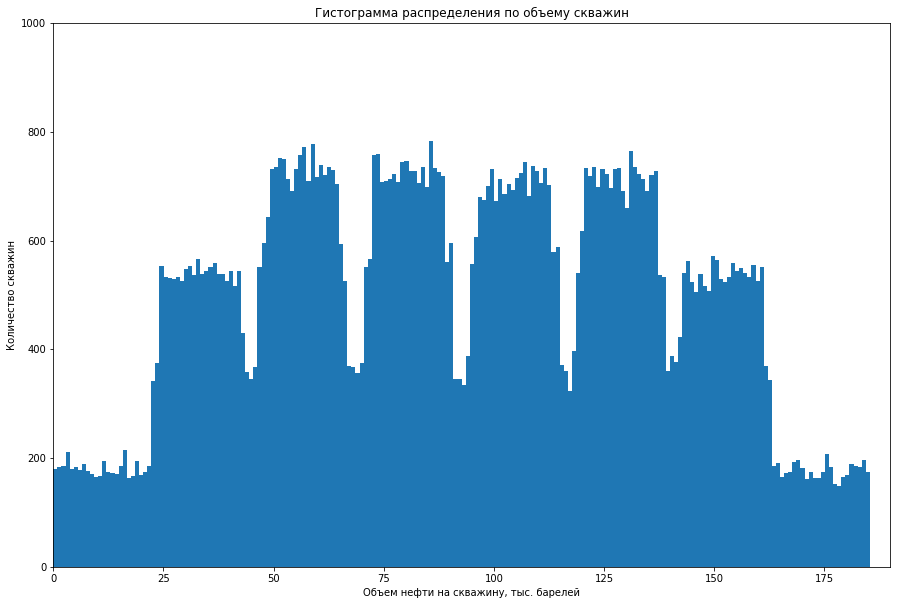

In [ ]:
oil_hist(geo_data_0['product'], 200, 190, 1000)

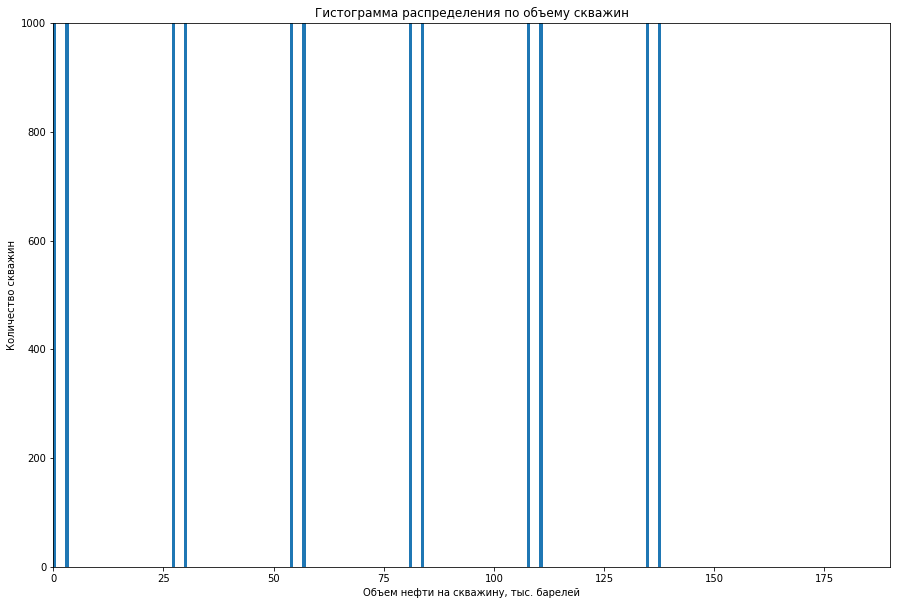

In [ ]:
oil_hist(geo_data_1['product'], 200, 190, 1000)

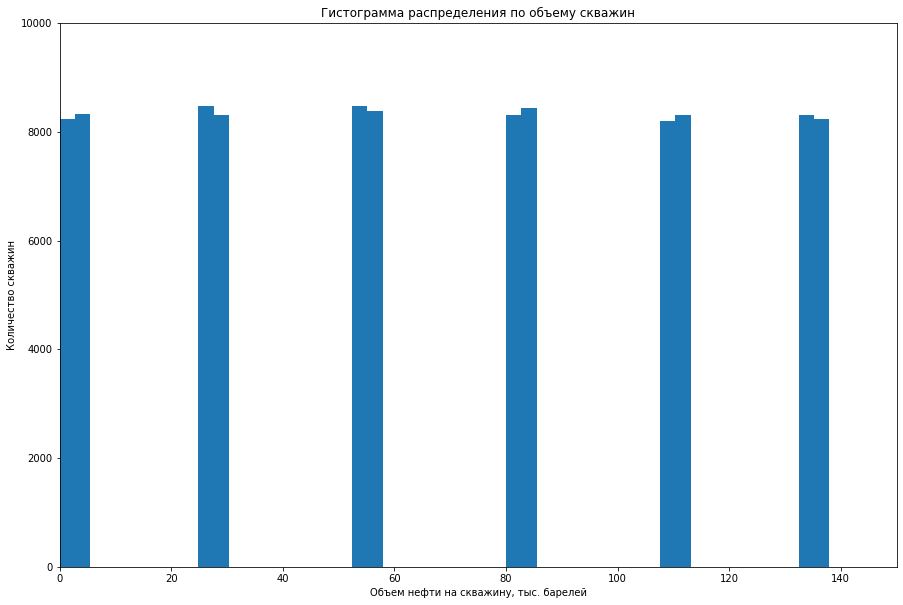

In [ ]:
oil_hist(geo_data_1['product'], 50, 150, 10000)

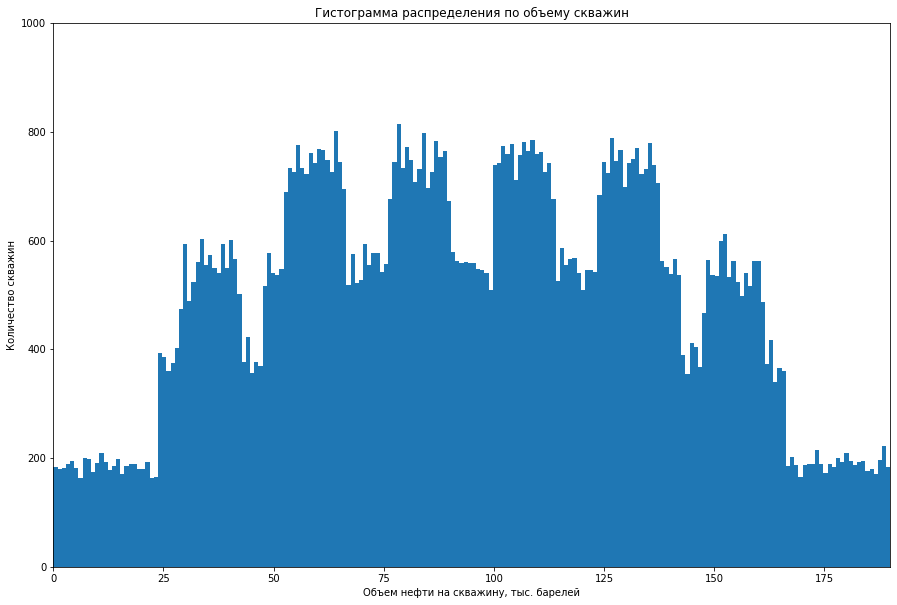

In [ ]:
oil_hist(geo_data_2['product'], 200, 190, 1000)

Признаки для модели:

* f0;
* f1;
* f2.

Целевой признак:

* product.

In [ ]:
geo_data_0.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [ ]:
geo_data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [ ]:
geo_data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


Отображение сводной информации датафреймов в транспорированном виде

### Вывод

Данные подготовлены к обучению модели.

Во втором месторождении около 8,2% месторождений не имело значения в столбце product. При сравнении с такими же значениями из первого и третьего региона можно понять, что были утеряны данные или не было исследовано количество барелей нефти.

По гистограммам можно понять, что у первого и третьего региона наспределение скважин близкое к нормальному. Во втором регионе данные имеют странное распределение: от 0 до 5 баррелей с шагом по 15-20 равномерно распределены 100000 значений. Данные не подчиняются закону больших чисел и скорей всего были введены искуственно.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Согласен, что колонка id на не нужна. Радует, что распределения были визуализированы!
</div>

## Обучение и проверка модели

Для обучения и проверки модели возьмем линейную регрессию.

Проверим качество модели линейной регрессии с текущим значением признаков и с масштабируемыми. 

Проверим эту гипотезу на первом из трех датафрейме geo_data_0.

Выполним разбивку неподготовленного датафрейма.

In [ ]:
def test_split(df, target):
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=26032022)
    
    return features_train, features_valid, target_train, target_valid

In [ ]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = test_split(geo_data_0, 'product')

features_train_0.head()

,f0,f1,f2
41860,-0.437678,0.924332,4.675126
76678,0.197112,0.248207,1.307016
51025,1.823081,-0.119775,3.284864
45412,-0.767099,0.811775,-1.939962
58899,2.018964,0.129922,-0.379970


Отмасштабируем данные с помощью скалера

In [ ]:
def test_split_scaled(df, numeric, target):
    geo_data_s = df.copy()

    features_s = geo_data_s.drop([target] , axis=1)
    target_s = geo_data_s[target]

    features_train_s, features_valid_s, target_train_s, target_valid_s = train_test_split(
        features_s, target_s, test_size=0.25, random_state=26032022)

    scaler = StandardScaler()
    scaler.fit(features_train_s[numeric])
    features_train_s[numeric] = scaler.transform(features_train_s[numeric])
    features_valid_s[numeric] = scaler.transform(features_valid_s[numeric])

    return features_train_s, features_valid_s, target_train_s, target_valid_s

* features - данные без масштаба
* features_s - скалированные данные с масштабом

Обучаю модель без измененных данных.

In [ ]:
model = LinearRegression()

model.fit(features_train_0, target_train_0)
predicted_target_0 = model.predict(features_valid_0)
print('RMSE -', mean_squared_error(target_valid_0, predicted_target_0)**0.5)

RMSE - 37.73566007095579


Проверяю каково RMSE на скалированных масштабированных данных.

In [ ]:
features_train_0s, features_valid_0s, target_train_0s, target_valid_0s = test_split_scaled(
                                                                        geo_data_0, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_0s, target_train_0s)
predicted_target_0s = model.predict(features_valid_0s)
print('RMSE -', mean_squared_error(target_valid_0s, predicted_target_0s)**0.5)

RMSE - 37.735660070955795


In [ ]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(geo_data_1, 'product')
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE -', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

features_train_1s, features_valid_1s, target_train_1s, target_valid_1s = test_split_scaled(
                                                                        geo_data_1, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_1s, target_train_1s)
predicted_target_1s = model.predict(features_valid_1s)
print('RMSE -', mean_squared_error(target_valid_1s, predicted_target_1s)**0.5)

RMSE - 0.8868720422591435
RMSE - 0.8868720422591435


In [ ]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(geo_data_2, 'product')
model.fit(features_train_2, target_train_2)
predicted_target_2 = model.predict(features_valid_2)
print('RMSE -', mean_squared_error(target_valid_2, predicted_target_2)**0.5)

features_train_2s, features_valid_2s, target_train_2s, target_valid_2s = test_split_scaled(
                                                                        geo_data_2, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_2s, target_train_2s)
predicted_target_2s = model.predict(features_valid_2s)
print('RMSE -', mean_squared_error(target_valid_2s, predicted_target_2s)**0.5)

RMSE - 40.098186367588596
RMSE - 40.098186367588596


Масштабирование данных не требуется.

Проверяю показатель RMSE при других гиперпараметрах модели

In [ ]:
model = LinearRegression(normalize=True)
model.fit(features_train_0, target_train_0)
predicted_target_0 = model.predict(features_valid_0)
print('RMSE -', mean_squared_error(target_valid_0, predicted_target_0)**0.5)

RMSE - 37.73566007095579


In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(features_train_0, target_train_0)
predicted_target_0 = model.predict(features_valid_0)
print('RMSE -', mean_squared_error(target_valid_0, predicted_target_0)**0.5)

RMSE - 61.56991080188307


Изменение стандартных значений гиперпараметров не улучшило модель. 

Произведу вывод предсказанного запаса с реальным и выведу RMSE.

In [ ]:
model = LinearRegression()

def oil_predict(df, target_name):
    features = df.drop([target_name] , axis=1)
    target = df[target_name]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=26032022)
    
    model.fit(features_train, target_train)
    predicted_target = model.predict(features_valid)
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target         
    }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    mean = data_frame['predicted_product'].mean()
    oil_sum = data_frame['predicted_product'].sum()
    return data_frame, rmse, mean, oil_sum

In [ ]:
geo_data_0_predicted, geo_data_0_rmse, geo_data_0_predicted_mean, geo_data_0_predicted_sum = oil_predict(geo_data_0, 'product')
print(geo_data_0_predicted.head())
print('RMSE -', geo_data_0_rmse)
print('Средний запас запасанного сырья -', geo_data_0_predicted_mean)

       real_product  predicted_product
54986     59.700392          90.669918
51644    144.840734         103.385048
84368     31.775404          83.979573
31727     59.638871          59.173975
55310    109.207511         104.592303
RMSE - 37.73566007095579
Средний запас запасанного сырья - 92.13365252293956


In [ ]:
geo_data_1_predicted, geo_data_1_rmse, geo_data_1_predicted_mean, geo_data_1_predicted_sum = oil_predict(geo_data_1, 'product')
print(geo_data_1_predicted.head())
print('RMSE -', geo_data_1_rmse)
print('Средний запас запасанного сырья -', geo_data_1_predicted_mean)

       real_product  predicted_product
54986    110.992147         110.603979
51644    110.992147         110.510219
84368     84.038886          82.459766
31727      3.179103           3.030710
55310     26.953261          28.848700
RMSE - 0.8868720422591435
Средний запас запасанного сырья - 69.08428488678001


In [ ]:
geo_data_2_predicted, geo_data_2_rmse, geo_data_2_predicted_mean, geo_data_2_predicted_sum = oil_predict(geo_data_2, 'product')
print(geo_data_2_predicted.head())
print('RMSE -', geo_data_2_rmse)
print('Средний запас запасанного сырья -', geo_data_2_predicted_mean)

       real_product  predicted_product
54986    109.780432          79.873735
51644     44.227150         101.206675
84368    112.988672         142.711445
31727     57.032069          67.496048
55310     96.667095          74.631459
RMSE - 40.098186367588596
Средний запас запасанного сырья - 95.07877762770322


Оцениваю общий запас на регион по предсказанным данным.

In [ ]:
print('Суммарный предсказанный запас в позиции 0 -', geo_data_0_predicted_sum)
print('Суммарный реальный запас в позиции 0 -', geo_data_0_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 1 -', geo_data_1_predicted_sum)
print('Суммарный реальный запас в позиции 1 -', geo_data_1_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 2 -', geo_data_2_predicted_sum)
print('Суммарный реальный запас в позиции 2 -', geo_data_2_predicted['real_product'].sum())

Суммарный предсказанный запас в позиции 0 - 2303341.313073489
Суммарный реальный запас в позиции 0 - 2313774.0416531255

Суммарный предсказанный запас в позиции 1 - 1727107.1221695004
Суммарный реальный запас в позиции 1 - 1726989.4251497295

Суммарный предсказанный запас в позиции 2 - 2376969.4406925803
Суммарный реальный запас в позиции 2 - 2380980.9928068956


### Вывод

Данные предсказаний о количестве нефти по сумме примерно совпадают по сумме с предсказанными значениями. 

Лучше всего модель предсказала запасы во втором регионе (RMSE - 0.88), далее в первом и третьем соотвественно.

Возможно утеряные данные из второго региона сказались на модели и она достаточно сильно переобучилась.

Но из-за утери данных и малого запаса в среднем на меторождение не имеет смысла рассматривать второе месторождение как прибыльное.

Изучим все регионы на риски и прибыль, но в конечном итоге будем выбирать между 1 и 3 регионом.

## Подготовка к расчёту прибыли

Создадам переменные об экономической информации.

In [ ]:
BUDGET = 1e+07
CHOSEN_POINTS = 500
BEST_POINTS = 200
PRICE_PER_BARREL = 450

Расчет прибыли в тысячах рублей за тысячу барелей, budget = 1 милиард сохранен в виде экспонентного числа.

Расчитаю безубыточную разработку сырья на 200 месторождениях. 

Найду среднее количество продукта в месторождениях необходимое для этого.

In [ ]:
average_profit_per_point = BUDGET / BEST_POINTS
print('Средняя прибыль на лучшую точку -', average_profit_per_point, 'тыс.руб.')

average_barrels_per_point = average_profit_per_point  / PRICE_PER_BARREL
print('Средний объем нефти на точку -',average_barrels_per_point, 'тыс. барелей')

average_barrels = BUDGET / PRICE_PER_BARREL
print('Средний объем нефти на регион -',average_barrels, 'тыс. барелей')

Средняя прибыль на лучшую точку - 50000.0 тыс.руб.
Средний объем нефти на точку - 111.11111111111111 тыс. барелей
Средний объем нефти на регион - 22222.222222222223 тыс. барелей


Выведу данные по запасу нефти.

In [ ]:
print('Средний запас фактичекой нефти на скважину в регионе 1', geo_data_0['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 2', geo_data_1['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 3', geo_data_2['product'].mean())

Средний запас фактичекой нефти на скважину в регионе 1 92.50000000000001
Средний запас фактичекой нефти на скважину в регионе 2 68.82500000000002
Средний запас фактичекой нефти на скважину в регионе 3 95.00000000000004


Создадам функцию для расчета приыли на 500 разведанных точек.

In [ ]:
def oil_profit_calculation(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return PRICE_PER_BARREL * selected.sum() - BUDGET

Выведу распределение предсказанных значений.

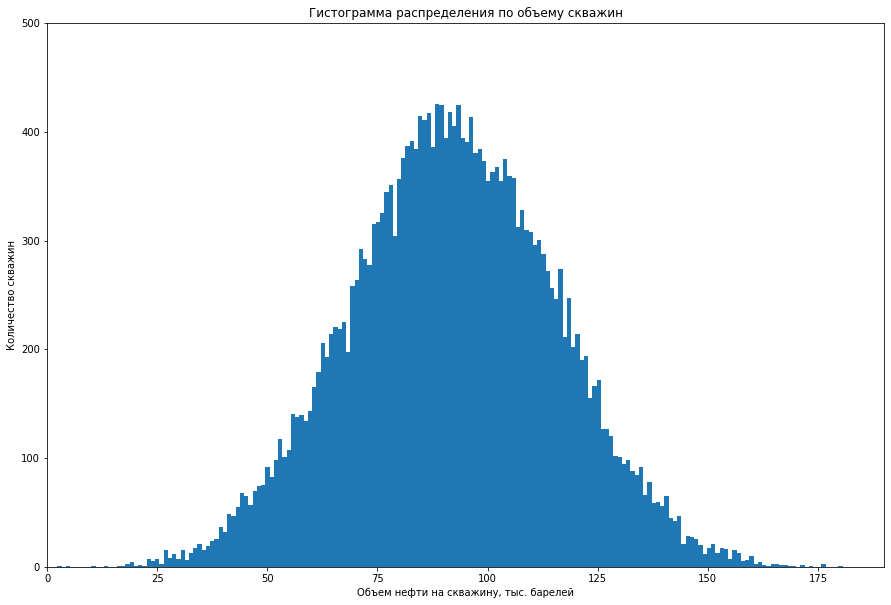

In [ ]:
oil_hist(geo_data_0_predicted['predicted_product'], 200, 190, 500)

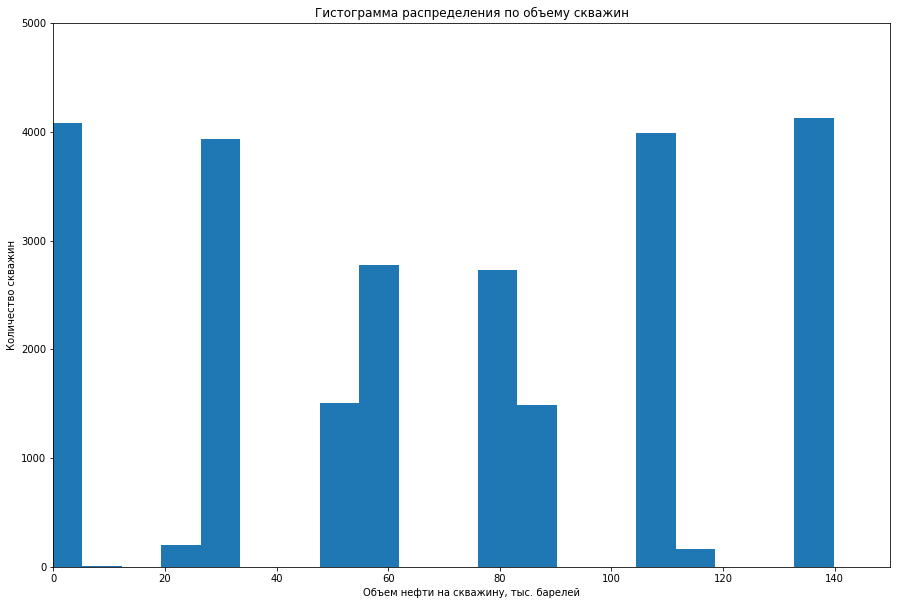

In [ ]:
oil_hist(geo_data_1_predicted['predicted_product'], 20, 150, 5000)

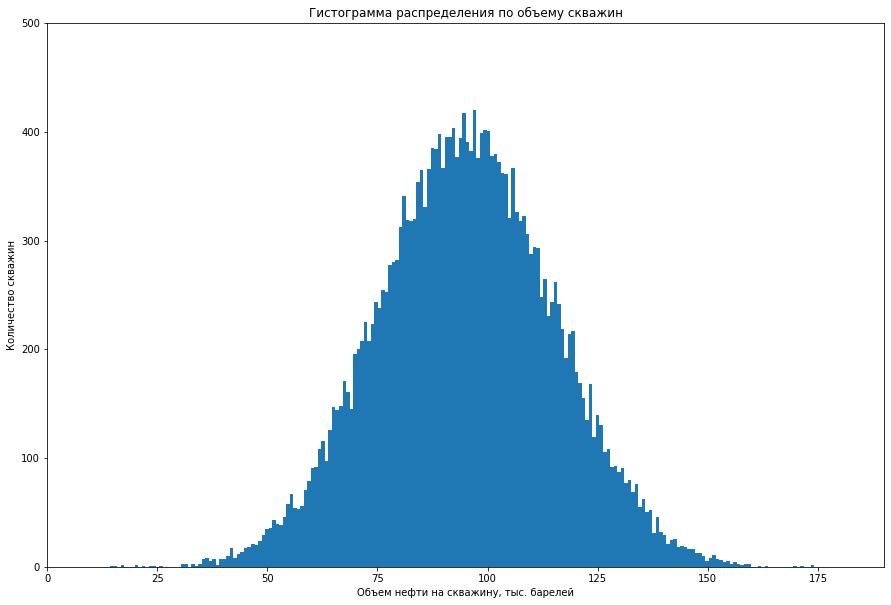

In [ ]:
oil_hist(geo_data_2_predicted['predicted_product'], 200, 190, 500)

### Вывод
Была подготовлена средняя оценка прибили за скважину и средний объем на скважину. И создана функция по расчету прибыли.

Анализ средних объемов на скважину для каждого региона следующий.

Изучены средние фактические запасы. Для первого и третьего - высокая вероятность окупить затраты. Разброс значений вокруг среднего 92.5 и 95 говорит нам о том, что существует достаточно много скважин, где запасы больше необходимого среднего.

Во вторых данных мб и есть определенный смысл - значений больше 111 достаточно много и при определенной доли везения можно выбрать только лучшие в этой выборке, хотя и среднее значение 68.8.

## Расчёт прибыли и рисков 

In [ ]:
state = np.random.RandomState(26032022)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=CHOSEN_POINTS)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calculation(target, probs_sample, BEST_POINTS)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

In [ ]:
average_0, lower_0, upper_0, risk_0 = bootstrap_1000(geo_data_0_predicted['real_product'], 
                                                     geo_data_0_predicted['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_0))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_0, upper_0))
print('Процент риска {:.2%}'.format(risk_0))

Данные по первому региону.
Средняя прибыль по региону = 406633.31 тыс.руб.
95% доверительный интервал от -159225.19 до 930828.82 тыс.руб.
Процент риска 8.00%


In [ ]:
average_1, lower_1, upper_1, risk_1 = bootstrap_1000(geo_data_1_predicted['real_product'], 
                                                     geo_data_1_predicted['predicted_product'])
print('Данные по второму региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Данные по второму региону.
Средняя прибыль по региону = 460677.94 тыс.руб.
95% доверительный интервал от 60384.50 до 848700.52 тыс.руб.
Процент риска 0.90%


In [ ]:
average_2, lower_2, upper_2, risk_2 = bootstrap_1000(geo_data_2_predicted['real_product'], 
                                                     geo_data_2_predicted['predicted_product'])
print('Данные по третьему региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Данные по третьему региону.
Средняя прибыль по региону = 420200.55 тыс.руб.
95% доверительный интервал от -133177.77 до 980009.35 тыс.руб.
Процент риска 6.10%


### Вывод

Данные были обработаны и рассчитаны прибыль, интервал и риски.

Рекомендую отсеивать первый и третий регион, так как риски остаточно велики. 
Второй регион рекомендуется, риск ниже требуемого. Кроме того доверительный интервал показывает, что разработка скважин окупится.

## Вывод по проекту
При выполнении следующего проекта было выполнено:

* Изучины данные. Проведена подготовка данных к моделированию.
* Обучена модель для каждого региона geo_data_0, geo_data_1 и geo_data_2.
* Составлена функция расчета прибыли в регионе.
* Посчитана прибыль и риски за каждый регион и обоснован выбор региона.

Второй регион получился лучшим по показателям предсказывания, хоть и данные не выглядят нормально распределенными.

* Средняя прибыль по второму региону (Средняя прибыль по региону = 460677.94 тыс.руб) — выше остальных регионов. 
* Процент риска 0.90%

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован